# 0. Package Installing

In [203]:
pip install category_encoders

In [ ]:
# pip install aequitas

# I. Data Integration and Privacy Compliance
Ensure compliance with data protection laws (e.g., GDPR, CCPA) and integrate disparate data sources into a unified dataset.

In [204]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Load JSON data from file
with open('persons.json', 'r') as file:
    data = json.load(file)

# Convert full information of a customer to a dataframe
raw_df = pd.json_normalize(data)

In [206]:
class CustomerDataHandler:
    def __init__(self):
        self.integrated_dataframe = pd.DataFrame()

    def integrate_data(self, dataframe):
        # Merge the new dataframe with the existing integrated dataframe
        self.integrated_dataframe = pd.concat([self.integrated_dataframe, dataframe], ignore_index=True)

    def anonymize_data(self):
        # Anonymize data to comply with privacy regulations
        # Remove personally identifiable information (PII)
        self.integrated_dataframe.drop(columns=['person.first_name', 'person.last_name', 'person.email', 'person.phone_number'], inplace=True)

    def export_integrated_dataset(self, filename):
        # Export integrated dataset to a file
        self.integrated_dataframe.to_csv(filename, index=False)


In [207]:
handler = CustomerDataHandler()

# Integrate data from multiple dataframes
handler.integrate_data(raw_df)

# Anonymize the integrated dataset
handler.anonymize_data()

# Get the datafram after applying Privacy Compliance
df = handler.integrated_dataframe

# Drop two list of objects columns
df = df.drop(columns=['bankTransactions', 'loanApplications'])
df.head()

,person.id,person.date_of_birth,person.nationality,person.occupation,person.created_at,person.updated_at,address.id,address.person_id,address.line_1,address.line_2,...,personCreditScore.factors.defaults,personCreditScore.factors.accountAge,personCreditScore.factors.totalDebt,personCreditScore.factors.incomeStability,personCreditScore.factors.spendingPatterns,personCreditScore.factors.savingsBehavior,personCreditScore.factors.creditInquiries,personCreditScore.monthlyIncome,personCreditScore.created_at,personCreditScore.updated_at
0,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29T18:17:14.097Z,Burkina Faso,Direct Research Executive,2024-02-13T04:39:26.757Z,2024-02-12T20:34:19.725Z,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,1,18,96883.72,True,high-risk,19136.39,7,1410.70,2024-02-13T06:11:45.897Z,2024-02-13T15:15:57.453Z
1,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29T18:17:14.097Z,Burkina Faso,Direct Research Executive,2024-02-13T04:39:26.757Z,2024-02-12T20:34:19.725Z,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,1,18,96883.72,True,high-risk,19136.39,7,1410.70,2024-02-13T06:11:45.897Z,2024-02-13T15:15:57.453Z
2,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29T18:17:14.097Z,Burkina Faso,Direct Research Executive,2024-02-13T04:39:26.757Z,2024-02-12T20:34:19.725Z,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,1,18,96883.72,True,high-risk,19136.39,7,1410.70,2024-02-13T06:11:45.897Z,2024-02-13T15:15:57.453Z
3,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29T18:17:14.097Z,Burkina Faso,Direct Research Executive,2024-02-13T04:39:26.757Z,2024-02-12T20:34:19.725Z,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,1,18,96883.72,True,high-risk,19136.39,7,1410.70,2024-02-13T06:11:45.897Z,2024-02-13T15:15:57.453Z
4,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29T18:17:14.097Z,Burkina Faso,Direct Research Executive,2024-02-13T04:39:26.757Z,2024-02-12T20:34:19.725Z,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,1,18,96883.72,True,high-risk,19136.39,7,1410.70,2024-02-13T06:11:45.897Z,2024-02-13T15:15:57.453Z


# II. Data Cleaning and Preprocessing
 Clean and preprocess data, addressing missing values, outliers, and feature encoding.

In [208]:

# Get list of bank transactions
bankTransactions = pd.json_normalize(data,record_path=['bankTransactions'])
bankTransactions.head()

,id,person_id,bank_account_id,amount,currency,credit_debit_indicator,status,booking_date_time,value_date_time,bank_transaction_code,transaction_information,balance_credit_debit_indicator,balance_type,balance_amount,balance_currency,supplementary_data,created_at,updated_at
0,b32ef686-e06b-4e69-9e78-20488cd92f7e,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,f544ca9f-b90f-44d5-a3f8-2dda05ebf888,159.24,USD,Debit,Completed,2024-02-13T03:21:21.122Z,2024-02-13T09:24:48.579Z,Some code,Transaction details,Debit,Some type,315.79,KES,{},2024-02-12T19:19:27.697Z,2024-02-13T02:53:27.889Z
1,1b633dc8-2a7f-4751-a7a8-c46bd7c683de,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,f544ca9f-b90f-44d5-a3f8-2dda05ebf888,399.40,USD,Credit,Completed,2024-02-12T20:34:50.301Z,2024-02-13T03:43:21.531Z,Some code,Transaction details,Credit,Some type,81.62,NGN,{},2024-02-13T01:15:14.844Z,2024-02-13T08:55:26.012Z
2,cff16596-b9a4-49bd-9cff-eb53dbf1d4b9,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,f544ca9f-b90f-44d5-a3f8-2dda05ebf888,647.64,USD,Credit,Pending,2024-02-13T11:04:00.290Z,2024-02-12T19:36:13.823Z,Some code,Transaction details,Debit,Some type,741.24,SGD,{},2024-02-13T04:19:42.142Z,2024-02-12T18:55:41.205Z
3,d6923337-dde8-4a0a-980c-91cf78a0c1b1,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,f544ca9f-b90f-44d5-a3f8-2dda05ebf888,960.02,USD,Debit,Completed,2024-02-13T08:01:42.498Z,2024-02-13T10:42:13.962Z,Some code,Transaction details,Debit,Some type,520.44,NOK,{},2024-02-12T18:52:14.220Z,2024-02-13T08:15:05.964Z
4,a573049f-dab6-4f35-bb0d-4fea74ad057d,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,f544ca9f-b90f-44d5-a3f8-2dda05ebf888,460.01,USD,Debit,Pending,2024-02-12T21:25:33.990Z,2024-02-13T05:20:59.150Z,Some code,Transaction details,Credit,Some type,387.38,MAD,{},2024-02-13T10:43:12.863Z,2024-02-12T20:47:11.616Z


In [209]:
# Get list of loan applications
loanApplications = pd.json_normalize(data,record_path=['loanApplications'])
loanApplications.head()

,id,person_id,status,paymentStatus,created_at,updated_at,funding_amount,funding_date,funding_reasons,credit_limit,credit_score_check_consent_given_at,region
0,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13T05:52:38.401Z,2024-02-13T05:58:45.932Z,531.59,2024-10-02T00:39:43.480Z,Debt-Consolidation,822.36,2024-02-13T02:44:01.362Z,Virginia
1,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12T22:23:16.145Z,2024-02-12T19:06:45.747Z,964.71,2025-02-07T20:09:40.279Z,Home-Moving,472.32,2024-02-12T22:52:56.418Z,New Jersey
2,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13T05:52:38.401Z,2024-02-13T05:58:45.932Z,531.59,2024-10-02T00:39:43.480Z,Debt-Consolidation,822.36,2024-02-13T02:44:01.362Z,Virginia
3,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12T22:23:16.145Z,2024-02-12T19:06:45.747Z,964.71,2025-02-07T20:09:40.279Z,Home-Moving,472.32,2024-02-12T22:52:56.418Z,New Jersey
4,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13T05:52:38.401Z,2024-02-13T05:58:45.932Z,531.59,2024-10-02T00:39:43.480Z,Debt-Consolidation,822.36,2024-02-13T02:44:01.362Z,Virginia


Understanding the data set and how is the data distributed.

In [210]:
df.info()
bankTransactions.info()
loanApplications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   person.id                                   50 non-null     object
 1   person.date_of_birth                        50 non-null     object
 2   person.nationality                          50 non-null     object
 3   person.occupation                           50 non-null     object
 4   person.created_at                           50 non-null     object
 5   person.updated_at                           50 non-null     object
 6   address.id                                  50 non-null     object
 7   address.person_id                           50 non-null     object
 8   address.line_1                              50 non-null     object
 9   address.line_2                              50 non-null     object
 10  address.city                

So, we see that the full data is 50 rows, that is 50 data points and 47 columns, that is 47 features. Out of 47 features, there are a list of bank transactions (with total of 3300 rows and 18 columns) and a list of loan applications (with total of 3300 rows and 12 columns).

We also see that 80% the features are string, so they are probably categorical features.

First, we have to convert some columns data to theirs usable types.

In [211]:
df = df.convert_dtypes()

In [212]:
df = df.astype({"address.property_equity":"float", "bankBalance.amount":"float","personCreditScore.factors.totalDebt":"float","personCreditScore.factors.savingsBehavior":"float","personCreditScore.monthlyIncome":"float"})
df['person.date_of_birth'] = pd.to_datetime(df['person.date_of_birth'])
df['person.created_at'] = pd.to_datetime(df['person.created_at'])
df['person.updated_at'] = pd.to_datetime(df['person.updated_at'])
df['address.start_date'] = pd.to_datetime(df['address.start_date'])
df['address.created_at'] = pd.to_datetime(df['address.created_at'])
df['address.updated_at'] = pd.to_datetime(df['address.updated_at'])
df['bankBalance.created_at'] = pd.to_datetime(df['bankBalance.created_at'])
df['bankBalance.updated_at'] = pd.to_datetime(df['bankBalance.updated_at'])
df['personCreditScore.created_at'] = pd.to_datetime(df['personCreditScore.created_at'])
df['personCreditScore.updated_at'] = pd.to_datetime(df['personCreditScore.updated_at'])
df.dtypes

person.id                                                  string
person.date_of_birth                          datetime64[ns, UTC]
person.nationality                                         string
person.occupation                                          string
person.created_at                             datetime64[ns, UTC]
person.updated_at                             datetime64[ns, UTC]
address.id                                                 string
address.person_id                                          string
address.line_1                                             string
address.line_2                                             string
address.city                                               string
address.county                                             string
address.postcode                                           string
address.region                                             string
address.country_code                                       string
address.st

In [213]:
bankTransactions = bankTransactions.convert_dtypes()
bankTransactions = bankTransactions.astype({"amount":"float","balance_amount":"float"})
bankTransactions['booking_date_time'] = pd.to_datetime(bankTransactions['booking_date_time'])
bankTransactions['value_date_time'] = pd.to_datetime(bankTransactions['value_date_time'])
bankTransactions['created_at'] = pd.to_datetime(bankTransactions['created_at'])
bankTransactions['updated_at'] = pd.to_datetime(bankTransactions['updated_at'])
bankTransactions.dtypes

id                                             string
person_id                                      string
bank_account_id                                string
amount                                        float64
currency                                       string
credit_debit_indicator                         string
status                                         string
booking_date_time                 datetime64[ns, UTC]
value_date_time                   datetime64[ns, UTC]
bank_transaction_code                          string
transaction_information                        string
balance_credit_debit_indicator                 string
balance_type                                   string
balance_amount                                float64
balance_currency                               string
supplementary_data                             string
created_at                        datetime64[ns, UTC]
updated_at                        datetime64[ns, UTC]
dtype: object

In [214]:
loanApplications = loanApplications.convert_dtypes()
loanApplications = loanApplications.astype({"funding_amount":"float","credit_limit":"float"})
loanApplications['funding_date'] = pd.to_datetime(loanApplications['funding_date'])
loanApplications['credit_score_check_consent_given_at'] = pd.to_datetime(loanApplications['credit_score_check_consent_given_at'])
loanApplications['created_at'] = pd.to_datetime(loanApplications['created_at'])
loanApplications['updated_at'] = pd.to_datetime(loanApplications['updated_at'])
loanApplications.dtypes

id                                                  string
person_id                                           string
status                                              string
paymentStatus                                       string
created_at                             datetime64[ns, UTC]
updated_at                             datetime64[ns, UTC]
funding_amount                                     float64
funding_date                           datetime64[ns, UTC]
funding_reasons                                     string
credit_limit                                       float64
credit_score_check_consent_given_at    datetime64[ns, UTC]
region                                              string
dtype: object

1. Handle missing values (if any)

In [215]:
# Count missing values in each column
missing_values_count = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values_count)

missing_values_count_bankTransactions = bankTransactions.isnull().sum()
print("Number of missing values in bankTransactions:")
print(missing_values_count_bankTransactions)


missing_values_count_loanApplications = loanApplications.isnull().sum()
print("Number of missing values in loanApplications:")
print(missing_values_count_loanApplications)

# => No missing values

Number of missing values in each column:
person.id                                     0
person.date_of_birth                          0
person.nationality                            0
person.occupation                             0
person.created_at                             0
person.updated_at                             0
address.id                                    0
address.person_id                             0
address.line_1                                0
address.line_2                                0
address.city                                  0
address.county                                0
address.postcode                              0
address.region                                0
address.country_code                          0
address.start_date                            0
address.current                               0
address.property_equity                       0
address.status                                0
address.created_at                            0

In [216]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

# Dropping columns that contain more than 50 percent null values per feature
for column in df.columns:
    if null_percentage(df[column].to_frame())['Percent'][0] > 50.00:
        df.drop([column], axis = 1, inplace = True)
        df.drop([column], axis = 1, inplace = True)

In [217]:
def mean_imputation(data):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    imputed_data = data.fillna(data.mean()).copy()
    return imputed_data

def median_imputation(data):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    imputed_data = data.fillna(data.median()).copy()
    return imputed_data

def mode_imputation(data):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    imputed_data = data.fillna(data.mode()).copy()
    return imputed_data

In [218]:
mean_imputation(df['bankBalance.amount']).head()

0    637.41
1    637.41
2    637.41
3    637.41
4    637.41
Name: bankBalance.amount, dtype: float64

2. We start with the analysis of numerical data.

In [219]:
df.describe()

,address.property_equity,bankBalance.amount,personCreditScore.score,personCreditScore.factors.latePayments,personCreditScore.factors.defaults,personCreditScore.factors.accountAge,personCreditScore.factors.totalDebt,personCreditScore.factors.savingsBehavior,personCreditScore.factors.creditInquiries,personCreditScore.monthlyIncome
count,5.000000e+01,50.00,50.0,50.0,50.0,50.0,5.000000e+01,50.00,50.0,50.0
mean,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7
std,1.148410e-13,0.00,0.0,0.0,0.0,0.0,1.469965e-11,0.00,0.0,0.0
min,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7
25%,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7
50%,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7
75%,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7
max,6.048800e+02,637.41,425.0,4.0,1.0,18.0,9.688372e+04,19136.39,7.0,1410.7


In [220]:
bankTransactions.describe()

,amount,balance_amount
count,3300.000000,3300.000000
mean,529.618333,449.759242
std,279.742870,281.097957
min,17.780000,29.770000
25%,284.530000,204.060000
50%,548.115000,417.995000
75%,746.930000,691.070000
max,981.580000,970.370000


In [221]:
loanApplications.describe()

,funding_amount,credit_limit
count,100.000000,100.000000
mean,748.150000,647.340000
std,217.650989,175.901718
min,531.590000,472.320000
25%,531.590000,472.320000
50%,748.150000,647.340000
75%,964.710000,822.360000
max,964.710000,822.360000


3. Visualize distributions

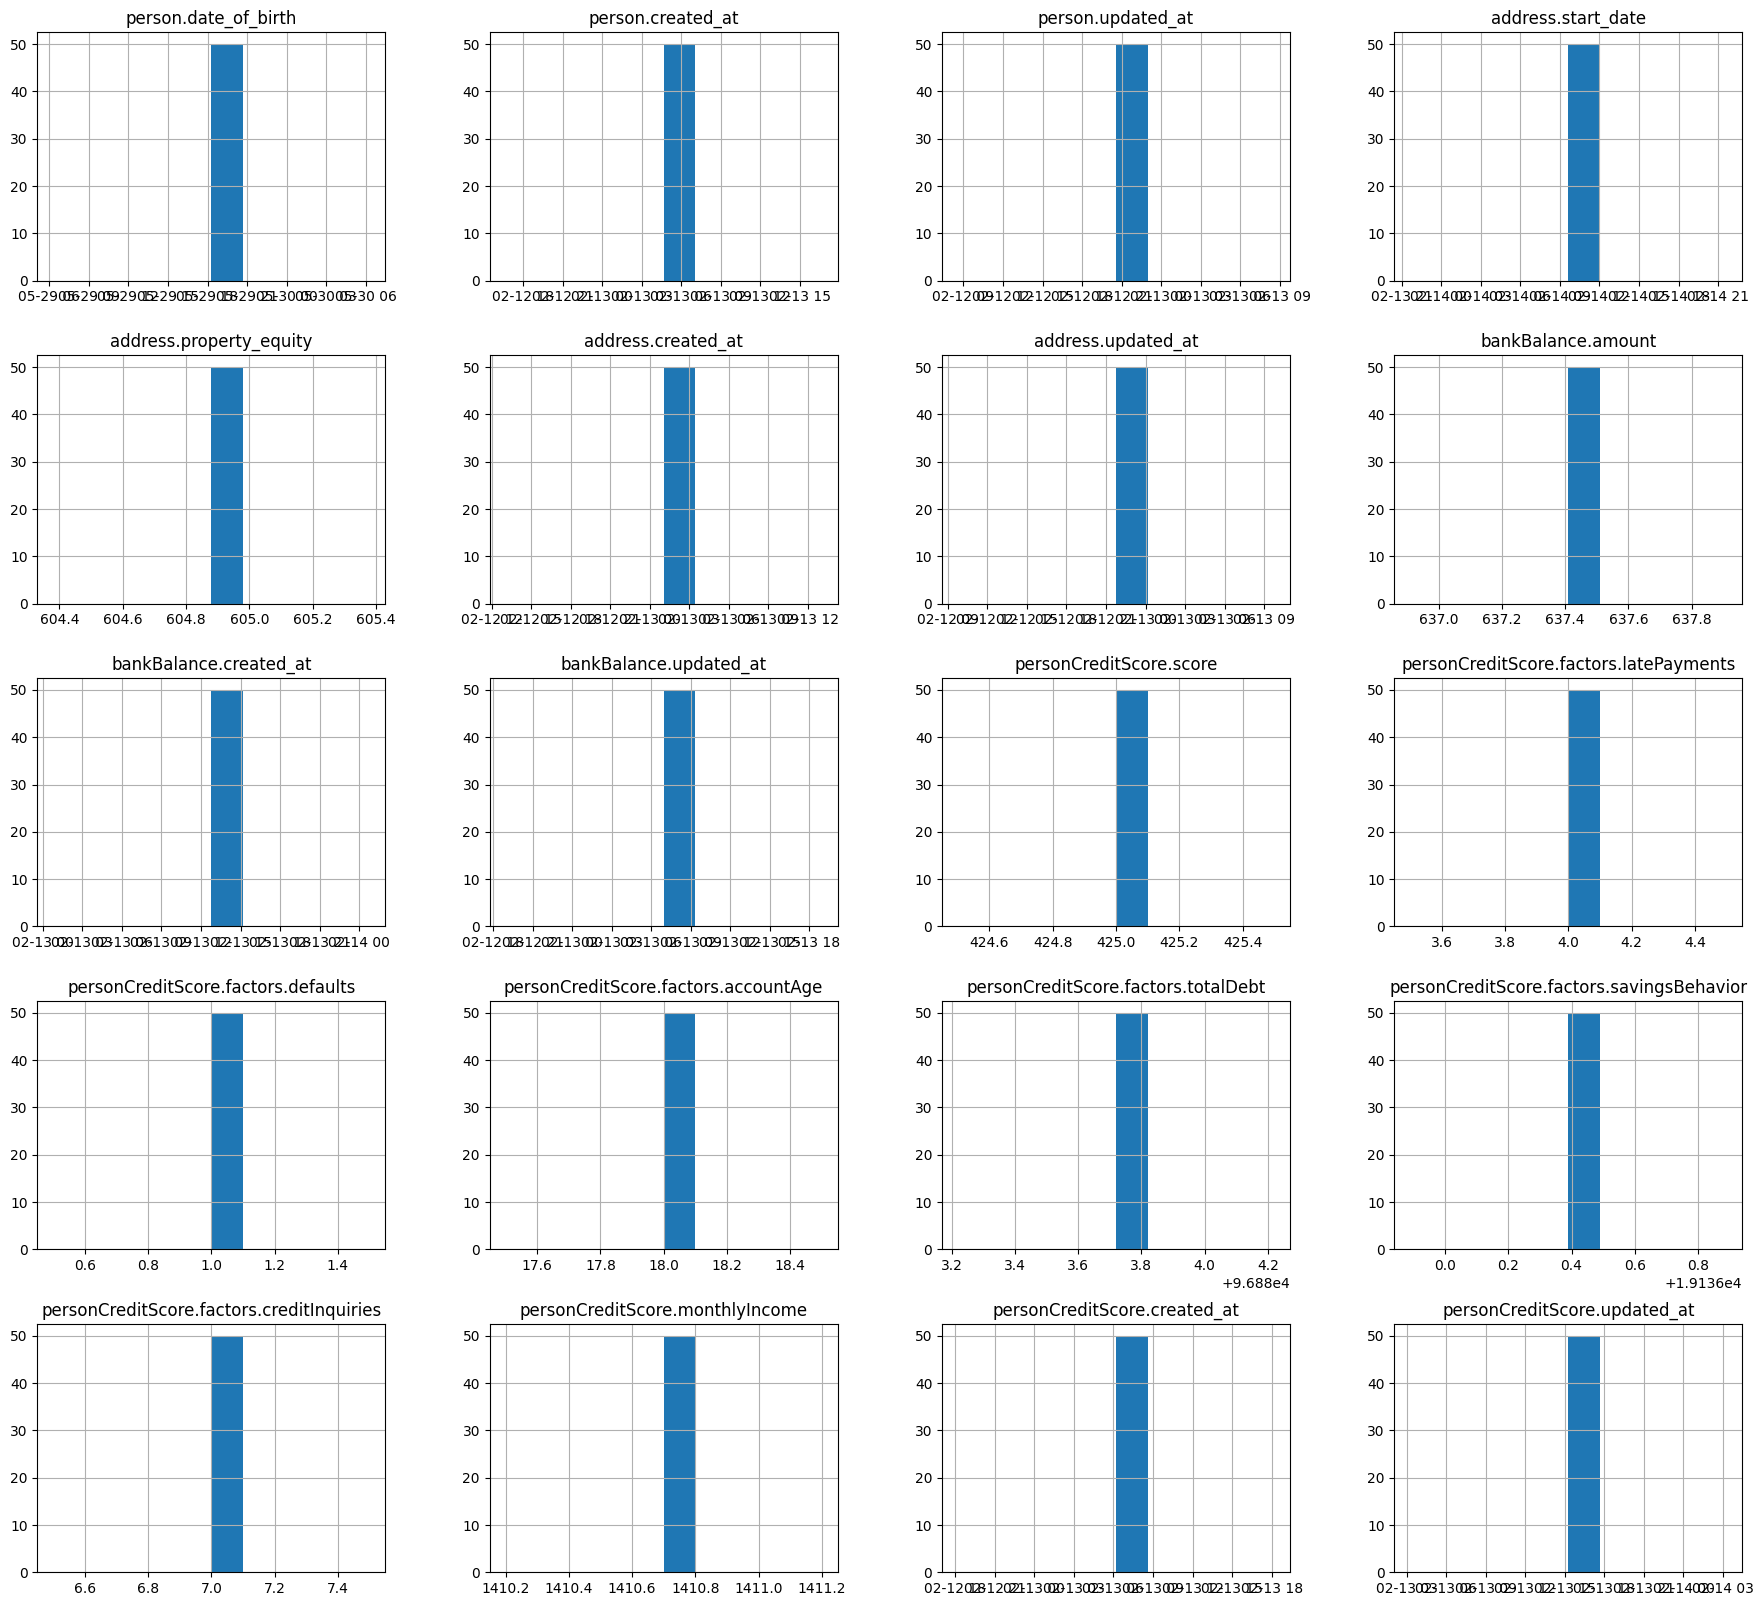

In [222]:
df.hist( figsize = (22, 20) )
plt.show()

Drom df.describe() and the above data distribution plot, we can see that 50 rows data is ***duplicated with the same values*** which cannot be used to train Machine Learning models for fraud detection.

**From now on we will use some hypothesis and try to describe the regular process of creating a Machine Learning models for loan default prediction.**

4. Convert currency rate

From the data, we also see that each account might have different currency balance, so we will convert all amount to GBP with real-time rate.

In [223]:
# Get currency for amount in loanApplications
u_loanApplications = pd.merge(loanApplications, df[['person.id', 'bankBalance.currency']].drop_duplicates(), left_on='person_id', right_on='person.id', how='left')
u_loanApplications.drop('person.id', axis=1, inplace=True)
u_loanApplications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   id                                   100 non-null    string             
 1   person_id                            100 non-null    string             
 2   status                               100 non-null    string             
 3   paymentStatus                        100 non-null    string             
 4   created_at                           100 non-null    datetime64[ns, UTC]
 5   updated_at                           100 non-null    datetime64[ns, UTC]
 6   funding_amount                       100 non-null    float64            
 7   funding_date                         100 non-null    datetime64[ns, UTC]
 8   funding_reasons                      100 non-null    string             
 9   credit_limit                     

In [224]:
import requests
import pandas as pd

# Function to exchange currency
def exchange_2(f: str, t: str, a: float) -> float:
    # Fetch exchange rates from an API
    api_key = 'API_KEY'
    url = f'https://open.er-api.com/v6/latest/{f}'
    response = requests.get(url, params={'apiKey': api_key})
    data = response.json()

    # Check if the API request was successful
    if response.status_code == 200:
        # Extract exchange rate for the target currency
        exchange_rate = data['rates'].get(t)
        if exchange_rate is not None:
            # Convert the amount to the target currency
            return a * exchange_rate
        else:
            raise ValueError(f"Exchange rate for currency '{t}' not found.")
    else:
        raise Exception(f"Failed to fetch exchange rates: {data['error']}")

def exchange_on_date(f: str, t: str, a: float, date: str) -> float:
    # Fetch historical exchange rates from an API
    api_key = 'API_KEY'
    url = f'https://open.er-api.com/v6/{date}'
    response = requests.get(url, params={'base': f, 'symbols': t, 'apikey': api_key})
    data = response.json()

    # Check if the API request was successful
    if response.status_code == 200:
        # Extract exchange rate for the target currency
        exchange_rate = data['rates'].get(t)
        if exchange_rate is not None:
            # Convert the amount to the target currency
            return a * exchange_rate
        else:
            raise ValueError(f"Exchange rate for currency '{t}' not found.")
    else:
        raise Exception(f"Failed to fetch exchange rates: {data['error']}")


# Update DataFrame with exchanged balances
def update_balance_df(df: pd.DataFrame, to_currency: str) -> pd.DataFrame:
    df['bankBalance.amount_GBP'] = df.apply(lambda row: exchange(row['bankBalance.currency'], to_currency, row['bankBalance.amount']), axis=1)
    df['totalDebt_GBP'] = df.apply(lambda row: exchange(row['bankBalance.currency'], to_currency, row['personCreditScore.factors.totalDebt']), axis=1)
    df['monthlyIncome_GBP'] = df.apply(lambda row: exchange(row['bankBalance.currency'], to_currency, row['personCreditScore.monthlyIncome']), axis=1)
    return df

def update_balance_bankTransactions(df: pd.DataFrame, to_currency: str) -> pd.DataFrame:
    df['trans_amount_GBP'] = df.apply(lambda row: exchange(row['currency'], to_currency, row['amount']), axis=1)
    df['trans_balance_amount_GBP'] = df.apply(lambda row: exchange(row['balance_currency'], to_currency, row['balance_amount']), axis=1)
    return df

def update_balance_loanApplications(df: pd.DataFrame, to_currency: str) -> pd.DataFrame:
    df['funding_amount_GBP'] = df.apply(lambda row: exchange(row['bankBalance.currency'], to_currency, row['funding_amount']), axis=1)
    df['credit_limit_GBP'] = df.apply(lambda row: exchange(row['bankBalance.currency'], to_currency, row['credit_limit']), axis=1)
    return df

# Update df
df = update_balance_df(df, 'GBP')
df.head()


,person.id,person.date_of_birth,person.nationality,person.occupation,person.created_at,person.updated_at,address.id,address.person_id,address.line_1,address.line_2,...,personCreditScore.factors.incomeStability,personCreditScore.factors.spendingPatterns,personCreditScore.factors.savingsBehavior,personCreditScore.factors.creditInquiries,personCreditScore.monthlyIncome,personCreditScore.created_at,personCreditScore.updated_at,bankBalance.amount_GBP,totalDebt_GBP,monthlyIncome_GBP
0,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29 18:17:14.097000+00:00,Burkina Faso,Direct Research Executive,2024-02-13 04:39:26.757000+00:00,2024-02-12 20:34:19.725000+00:00,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,True,high-risk,19136.39,7,1410.7,2024-02-13 06:11:45.897000+00:00,2024-02-13 15:15:57.453000+00:00,506.737398,77022.017558,1121.498639
1,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29 18:17:14.097000+00:00,Burkina Faso,Direct Research Executive,2024-02-13 04:39:26.757000+00:00,2024-02-12 20:34:19.725000+00:00,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,True,high-risk,19136.39,7,1410.7,2024-02-13 06:11:45.897000+00:00,2024-02-13 15:15:57.453000+00:00,506.737398,77022.017558,1121.498639
2,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29 18:17:14.097000+00:00,Burkina Faso,Direct Research Executive,2024-02-13 04:39:26.757000+00:00,2024-02-12 20:34:19.725000+00:00,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,True,high-risk,19136.39,7,1410.7,2024-02-13 06:11:45.897000+00:00,2024-02-13 15:15:57.453000+00:00,506.737398,77022.017558,1121.498639
3,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29 18:17:14.097000+00:00,Burkina Faso,Direct Research Executive,2024-02-13 04:39:26.757000+00:00,2024-02-12 20:34:19.725000+00:00,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,True,high-risk,19136.39,7,1410.7,2024-02-13 06:11:45.897000+00:00,2024-02-13 15:15:57.453000+00:00,506.737398,77022.017558,1121.498639
4,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,1959-05-29 18:17:14.097000+00:00,Burkina Faso,Direct Research Executive,2024-02-13 04:39:26.757000+00:00,2024-02-12 20:34:19.725000+00:00,d28938a9-5d25-4296-8999-f9f5a41a0deb,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,36473 E Front Street,Suite 582,...,True,high-risk,19136.39,7,1410.7,2024-02-13 06:11:45.897000+00:00,2024-02-13 15:15:57.453000+00:00,506.737398,77022.017558,1121.498639


In [225]:
# bankTransactions = update_balance_bankTransactions(bankTransactions, 'GBP')
# bankTransactions.head()
loanApplications = update_balance_loanApplications(u_loanApplications, 'GBP')
loanApplications.head()

,id,person_id,status,paymentStatus,created_at,updated_at,funding_amount,funding_date,funding_reasons,credit_limit,credit_score_check_consent_given_at,region,bankBalance.currency,funding_amount_GBP,credit_limit_GBP
0,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618
1,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12 22:23:16.145000+00:00,2024-02-12 19:06:45.747000+00:00,964.71,2025-02-07 20:09:40.279000+00:00,Home-Moving,472.32,2024-02-12 22:52:56.418000+00:00,New Jersey,USD,766.939075,375.491768
2,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618
3,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12 22:23:16.145000+00:00,2024-02-12 19:06:45.747000+00:00,964.71,2025-02-07 20:09:40.279000+00:00,Home-Moving,472.32,2024-02-12 22:52:56.418000+00:00,New Jersey,USD,766.939075,375.491768
4,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618


5. Get the target labels

From the data, we can consider the feature "***status***" in loanApplications as the target labels. For each loan application, if  "***status***" is "***Rejected***" then "***RISK_FLAG***" is 1, otherwise, "***RISK_FLAG***" is 0.

In [226]:
status_map = {"Rejected": 1, "Accepted": 0}
loanApplications['RISK_FLAG'] = loanApplications['status'].map(status_map)
loanApplications.head()

,id,person_id,status,paymentStatus,created_at,updated_at,funding_amount,funding_date,funding_reasons,credit_limit,credit_score_check_consent_given_at,region,bankBalance.currency,funding_amount_GBP,credit_limit_GBP,RISK_FLAG
0,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618,1
1,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12 22:23:16.145000+00:00,2024-02-12 19:06:45.747000+00:00,964.71,2025-02-07 20:09:40.279000+00:00,Home-Moving,472.32,2024-02-12 22:52:56.418000+00:00,New Jersey,USD,766.939075,375.491768,1
2,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618,1
3,443246e2-b85f-43ce-9c12-05e1c42c5118,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,Completed,2024-02-12 22:23:16.145000+00:00,2024-02-12 19:06:45.747000+00:00,964.71,2025-02-07 20:09:40.279000+00:00,Home-Moving,472.32,2024-02-12 22:52:56.418000+00:00,New Jersey,USD,766.939075,375.491768,1
4,a1eda21a-30a0-4269-931a-a90a6575a66f,4d28ba38-8b14-4456-aba8-c3dbd5da4f86,Rejected,On-Track,2024-02-13 05:52:38.401000+00:00,2024-02-13 05:58:45.932000+00:00,531.59,2024-10-02 00:39:43.480000+00:00,Debt-Consolidation,822.36,2024-02-13 02:44:01.362000+00:00,Virginia,USD,422.611088,653.771618,1


# III. Exploratory Data Analysis (EDA)
Conduct EDA to understand data distributions, correlations, and patterns.

1. Analyzing Numerical Columns - Data Distribution, Correlations

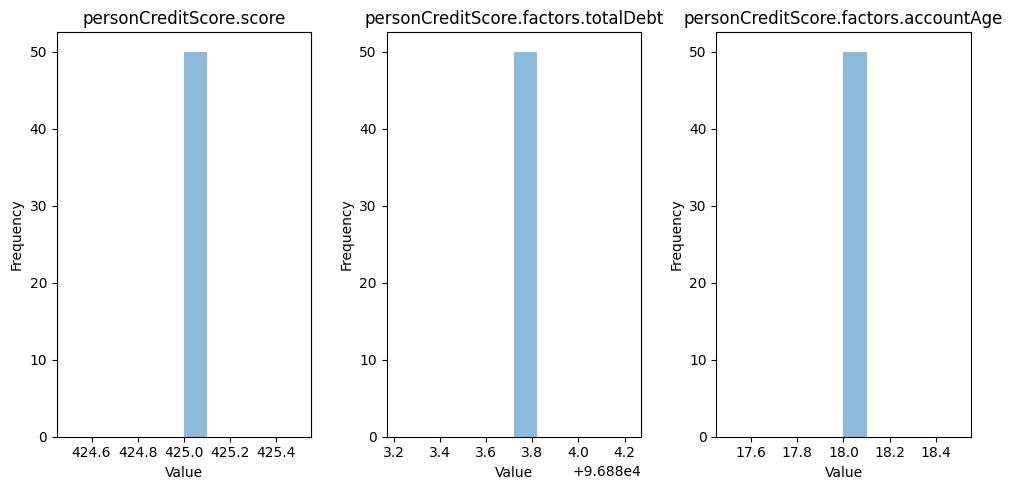

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify columns to plot - some numerical feature that needs to evaluate here
columns_to_plot = ['personCreditScore.score', 'personCreditScore.factors.totalDebt', 'personCreditScore.factors.accountAge']

# Plot the distribution of each specified column separately
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 5))

# Loop through each specified column and plot its distribution
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=10, alpha=0.5)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

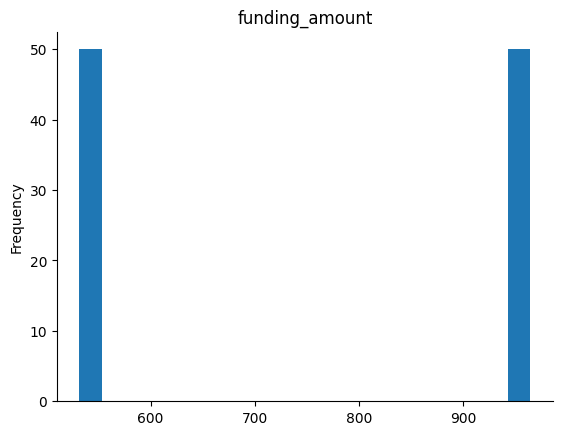

In [228]:
# @title loanApplications - funding_amount

from matplotlib import pyplot as plt
loanApplications['funding_amount'].plot(kind='hist', bins=20, title='funding_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

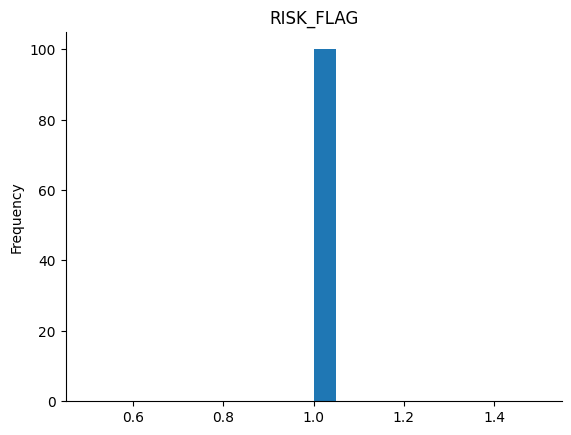

In [229]:
# @title Distribution of RISK_FLAG

from matplotlib import pyplot as plt
loanApplications['RISK_FLAG'].plot(kind='hist', bins=20, title='RISK_FLAG')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [230]:
loanApplications['RISK_FLAG'].value_counts()

1    100
Name: RISK_FLAG, dtype: int64

***NOTE***: Usually, in rea data, only a small part of the target variable consists of people who default on loans.

Since we are dealing with data that is not balanced, it is important to perform the balancing, especially for the minority class which in our case is the possibility that a person might default on a loan. We use various sampling techniques such as SMOTE and Random sampling to get the best outputs from the machine learning models.

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

[NearMiss](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html)


<ipython-input-231-1f27b7d9fcfb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loanApplications.corr()


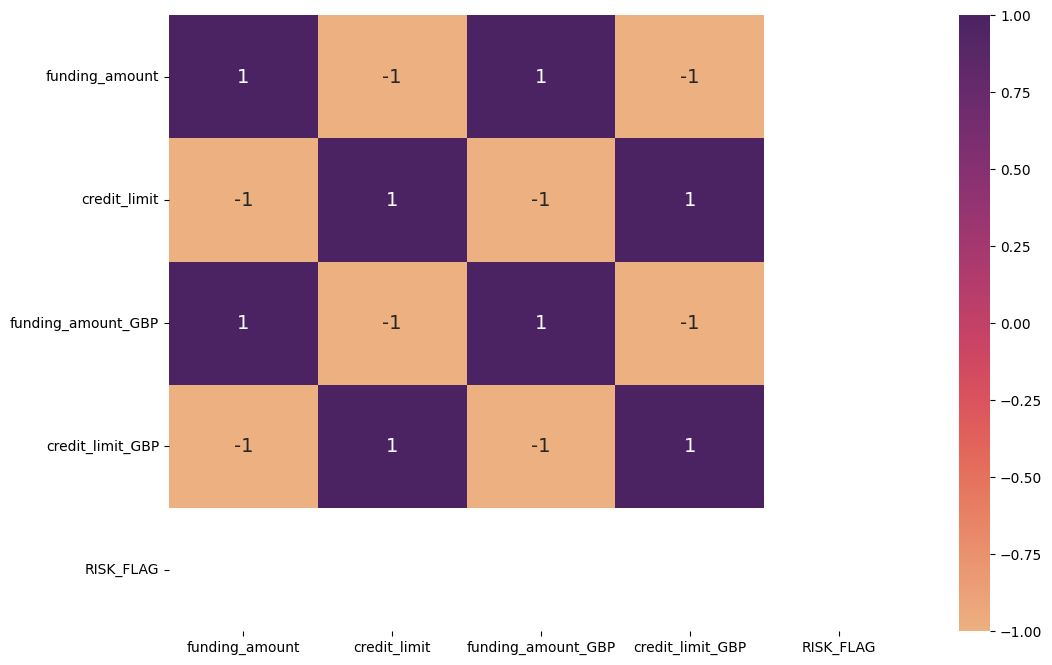

In [231]:
# Correlation heatmap
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = loanApplications.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

<ipython-input-232-154550cc6bdf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bankTransactions.corr()


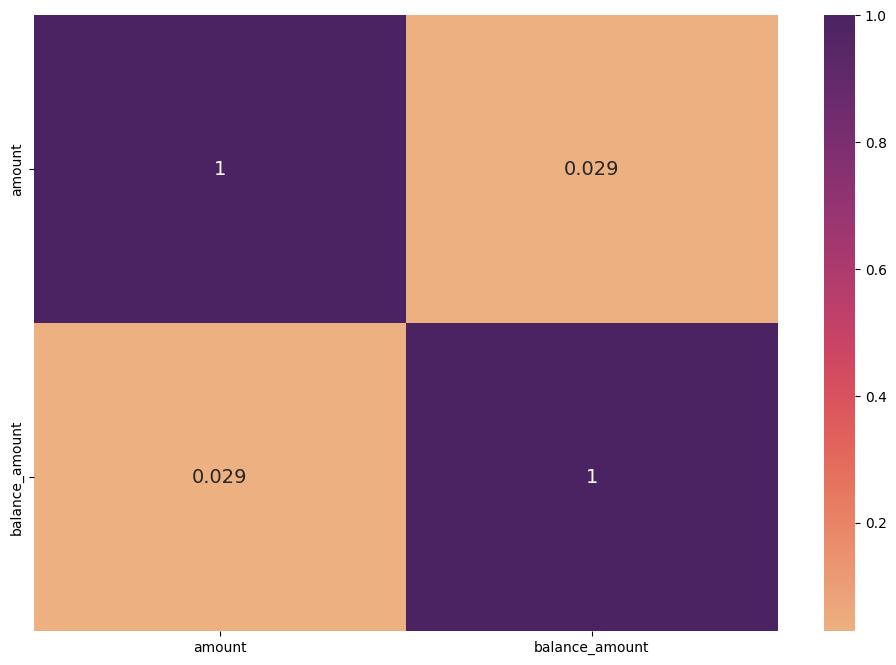

In [232]:
# Correlation heatmap
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = bankTransactions.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

2. Analyzing Categorical Features

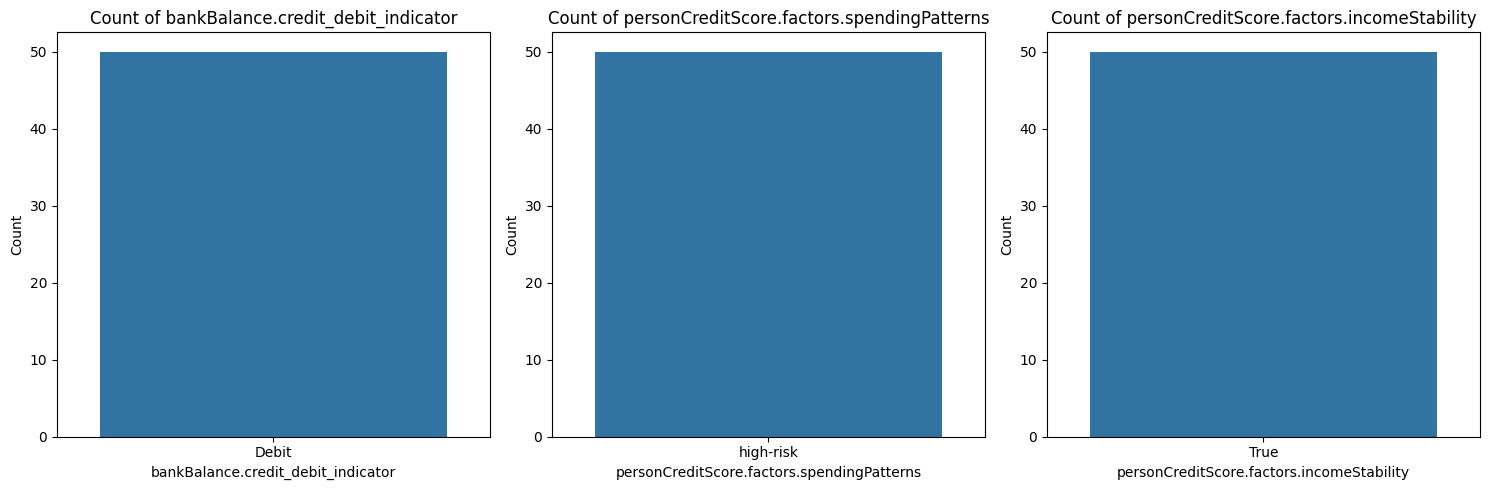

In [233]:
# Specify columns to plot - some numerical feature that needs to evaluate here
columns_to_plot = ['bankBalance.credit_debit_indicator', 'personCreditScore.factors.spendingPatterns', 'personCreditScore.factors.incomeStability']

# Plot the distribution of each specified column separately
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Loop through each specified column and plot its distribution
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [234]:
print( "Total categories in city:", len( df["address.city"].unique() ) )
print()
print( df["address.city"].value_counts() )

Total categories in city: 1

San Bernardino    50
Name: address.city, dtype: Int64


In [235]:
print( "Total categories in county:", len( df["address.county"].unique() ) )
print()
print( df["address.county"].value_counts() )

Total categories in county: 1

Johnson County    50
Name: address.county, dtype: Int64


In [236]:
print( "Total categories in region:", len( df["address.region"].unique() ) )
print()
print( df["address.region"].value_counts() )

Total categories in region: 1

Maine    50
Name: address.region, dtype: Int64


In [237]:
print( "Total categories in nationality:", len( df["person.nationality"].unique() ) )
print()
print( df["person.nationality"].value_counts() )

Total categories in nationality: 1

Burkina Faso    50
Name: person.nationality, dtype: Int64


In [238]:
print( "Total categories in occupation:", len( df["person.occupation"].unique() ) )
print()
print( df["person.occupation"].value_counts() )

Total categories in occupation: 1

Direct Research Executive    50
Name: person.occupation, dtype: Int64


3. Data Analysis

Now, we start with understanding the relationship between the different data features.

In [239]:
# Merge loanApplications data with personal data
data = pd.merge(loanApplications, df.drop_duplicates(), left_on='person_id', right_on='person.id', how='left')
data.drop('person.id', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   id                                          100 non-null    string             
 1   person_id                                   100 non-null    string             
 2   status                                      100 non-null    string             
 3   paymentStatus                               100 non-null    string             
 4   created_at                                  100 non-null    datetime64[ns, UTC]
 5   updated_at                                  100 non-null    datetime64[ns, UTC]
 6   funding_amount                              100 non-null    float64            
 7   funding_date                                100 non-null    datetime64[ns, UTC]
 8   funding_reasons                          

<Axes: xlabel='RISK_FLAG', ylabel='funding_amount'>

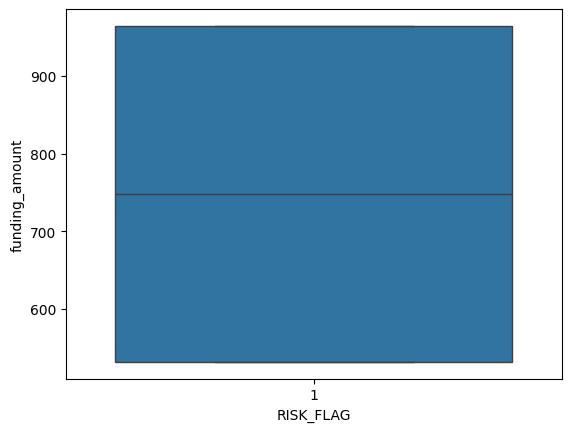

In [240]:
sns.boxplot(x ="RISK_FLAG",y="funding_amount" ,data = data)

<Axes: xlabel='personCreditScore.factors.incomeStability', ylabel='count'>

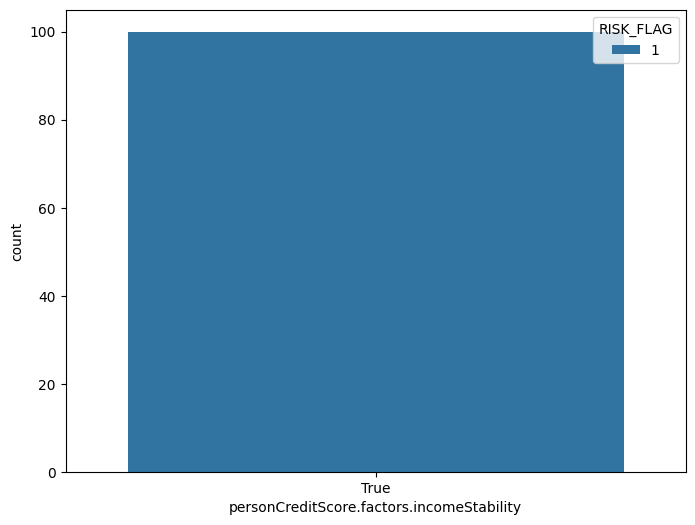

In [241]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='personCreditScore.factors.incomeStability', hue='RISK_FLAG', ax=ax, data=data)

# IV. Feature Engineering
Develop features capturing customer risk profiles. Utilize domain knowledge for predictive feature construction.

1. Get new features: personal age from date_of_birth, address_age from start_date

In [242]:
current_date = pd.to_datetime('today').date()

# Calculate age
data['person.date_of_birth'] = pd.to_datetime(data['person.date_of_birth']).dt.date
data['person.age'] = (current_date - data['person.date_of_birth']).astype('<m8[Y]')

data['address.duration'] = pd.to_datetime(data['address.start_date']).dt.date
data['address.duration'] = (current_date - data['address.duration']).astype('<m8[Y]')


2. Apply encoding to the categorical features.

In [243]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Subset of categorical features to encode
categorical_columns = ['bankBalance.credit_debit_indicator', 'personCreditScore.factors.spendingPatterns', 'personCreditScore.factors.incomeStability']

# Apply LabelEncoder to the selected categorical features
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Display encoded DataFrame
data['bankBalance.credit_debit_indicator'].head()

0    0
1    0
2    0
3    0
4    0
Name: bankBalance.credit_debit_indicator, dtype: int64

In [244]:
import category_encoders as ce

high_card_features = ['person.occupation', 'person.nationality', 'address.city', 'address.region', 'address.status', 'region']
count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))
data= data.drop(labels=high_card_features, axis=1)

3. Drop unessecery columns

In [245]:
minor_features = ['person.date_of_birth', 'person.created_at', 'person.updated_at', 'address.id', 'address.person_id', 'address.county', 'address.start_date', 'address.created_at', 'address.updated_at', 'bankBalance.person_id', 'bankBalance.amount', 'bankBalance.currency' 'bankBalance.created_at', 'bankBalance.updated_at', 'personCreditScore.person_id',  'personCreditScore.meta_data_description', 'personCreditScore.created_at','personCreditScore.updated_at','status', 'funding_amount', 'created_at', 'updated_at', 'credit_score_check_consent_given_at', 'personCreditScore.factors.totalDebt', 'personCreditScore.monthlyIncome']
data= data.drop(labels=minor_features, axis=1)
data.info()

KeyError: "['bankBalance.currencybankBalance.created_at'] not found in axis"

4. Create features from bankTransactions

- Number of Credit sucessful transactions (the last 1 - 7 - 30 days - 60 days)
- Number of Credit failed transactions (the last 1 - 7 - 30 days - 60 days)
- Number of Debit sucessful transactions (the last 1 - 7 - 30 days - 60 days)
- Number of Debit failed transactions (the last 1 - 7 - 30 days - 60 days)
- Total amount of Credit sucessful transactions (the last 1 - 7 - 30 days - 60 days)
- Total amount of Credit failed transactions (the last 1 - 7 - 30 days - 60 days)
- Total amount of Debit sucessful transactions (the last 1 - 7 - 30 days - 60 days)
- Total amount of Debit failed transactions (the last 1 - 7 - 30 days - 60 days)

1. Transaction Amount Statistics:

- Mean transaction amount

- Median transaction amount

- Standard deviation of transaction amount

- Total transaction amount over the last 1 - 3 - 6 months

2. Transaction Frequency:

- Number of transactions over the last 1 - 3 - 6 months

- Number of transactions during different time periods (e.g., business hours, weekends)

3. Transaction Categories:

- Number of different transaction categories (e.g., groceries, utilities, entertainment) - bank_transaction_code

- Frequency of transactions in some main category

4. Transaction Patterns:

Regularity of transactions (e.g., presence of recurring payments)
Time between transactions (e.g., average time between transactions)
- Time since the last transaction


5. Account Balance Trends:

- Average account balance

- Minimum and maximum account balance

- Account balance volatility (e.g., standard deviation of account balance)


6. Distribution of transactions across different locations (e.g., city, country)

- Frequency of transactions in each location

7. Payment Behavior:

- Proportion of successful payments

- Proportion of failed payments


**From here, because the provided data is all duplicated which can not be used to create features and train Machine Learning models for loan default prediction => We will provide some example code which is commented to ensure that file can be run without errors**

In [248]:
# SAMPLE CODE

#  Calculate Transaction Amount Statistics
transaction_amount_stats = {
    'mean_transaction_amount': bankTransactions['amount'].mean(),
    'median_transaction_amount': bankTransactions['amount'].median(),
    'std_transaction_amount': bankTransactions['amount'].std(),
    'min_transaction_amount': bankTransactions['amount'].min(),
    'max_transaction_amount': bankTransactions['amount'].max(),
    'total_transaction_amount': bankTransactions['amount'].sum()
}

# Calculate Transaction Frequency - EXISTING DATA IS NOT RIGHT TO COMPUTE - ONLY 1 RECORDS
# transaction_frequency = {
#     'num_transactions': len(bankTransactions),
#     'num_transactions_per_day': len(bankTransactions) / (bankTransactions['booking_date_time'].max() - bankTransactions['booking_date_time'].min()).days,
#     'num_transactions_per_week': len(bankTransactions) / ((bankTransactions['booking_date_time'].max() - bankTransactions['booking_date_time'].min()).days / 7),
#     'num_transactions_per_month': len(bankTransactions) / ((bankTransactions['booking_date_time'].max() - bankTransactions['booking_date_time'].min()).days / 30)
# }

# Print extracted features
print("Transaction Amount Statistics:")
print(transaction_amount_stats)
print("\nTransaction Frequency:")
print(transaction_frequency)




Transaction Amount Statistics:
{'mean_transaction_amount': 529.6183333333333, 'median_transaction_amount': 548.115, 'std_transaction_amount': 279.74286984661325, 'min_transaction_amount': 17.78, 'max_transaction_amount': 981.58, 'total_transaction_amount': 1747740.5}


AFter getting these features, combine them with all personal and loan data.

# V. Model Development and Selection
Experiment with various ML models and perform hyperparameter tuning for optimization.

1. Splitting the Data into Train and Test Splits - We have taken the test size to be 20% of the entire data.

In [250]:
# SAMPLE CODE

# x = data.drop("RISK_FLAG", axis=1)
# y = data["RISK_FLAG"]
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)


2. ML Models

 We can try several ML models to see the results of each models with our data

2.1 Naive Bayes Classifier

In [ ]:
# SAMPLE CODE

# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)
# y_predictions = model.predict(X_cv)
# fig, ax = plt.subplots(figsize = (10, 10))
# plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
# plt.show()

2.2 Decision Tree Classifier



In [ ]:
# SAMPLE CODE

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# y_predictions = model.predict(X_cv)
# fig, ax = plt.subplots(figsize = (10, 10))
# plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
# plt.show()

2.3 Tree-based algorithms, such as random forests, play a crucial role in loan default prediction and credit risk assessment. These algorithms are adept at handling both classification and regression tasks, making them valuable in analyzing loan applications. By generating predictions based on training samples, they offer high accuracy and stability, crucial for identifying potential defaulters.

In the context of loan default prediction, tree-based algorithms help minimize false negatives and false positives, ensuring robust risk assessment. While individual decision trees may overfit training data, random forests mitigate this issue by averaging predictions from multiple trees, resulting in improved prediction accuracy.

==> ***Use Random Forest Classifier***

The Random Forest approach is appropriate for classification and regression tasks on datasets with many entries and features that are likely to have missing values when we need a highly accurate result while avoiding overfitting.

Now, we train the model and perform the predictions.

In [252]:
# SAMPLE CODE

# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
# smote_sampler = SMOTE(random_state=9)
# pipeline = Pipeline(steps = [['smote', smote_sampler],
#                              ['classifier', rf_clf]])
# pipeline.fit(x_train, y_train)
# y_pred = pipeline.predict(x_test)

# VI. Model Evaluation

The output variable in our case is discrete. Therefore, metrics that compute the outcomes for discrete variables should be taken into consideration and the problem should be mapped under classification. Below are the metrics for the classification problem of predicting whether a person would default on a loan or not.


Use metrics like AUC-ROC, accuracy, F1-score, and precision-recall. Focus on minimizing false negatives impacting financial decisions.

In [ ]:
# SAMPLE CODE

# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
# print("-------------------------TEST SCORES-----------------------")
# print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
# print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
# print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
# print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
# print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

Visualizing Receiver Operating Characteristic - ROC curve

In [ ]:
# class_probabilities = model.predict_proba(X_cv)
# preds = class_probabilities[:, 1]

# fpr, tpr, threshold = roc_curve(y_cv, preds)
# roc_auc = auc(fpr, tpr)

# # Printing AUC
# print(f"AUC for our classifier is: {roc_auc}")

# # Plotting the ROC
# plt.figure(figsize = (10, 10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

Visualizing confision matrix

In [ ]:
# fig, ax = plt.subplots(figsize = (10, 10))
# plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
# plt.show()

# VII. Hyperparameter Tuning (Random Forest Model)

Using GridSearch for hyperparamater tuning in Random Forest Model to select the best params

In [ ]:
# SAMPLE CODE

# from sklearn.model_selection import GridSearchCV
# from tqdm import tqdm
# # This code cell can take about 10 minutes to run as we are performing hyperparameter tuning

# # Define the parameter grid for tuning
# param_grid = {'n_estimators': [10, 20]}

# # Define the classifier used
# model = RandomForestClassifier(n_jobs = -1)

# # Create the grid search object
# grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

# # Create a progress bar
# pbar = tqdm(total=len(grid_search.param_grid['n_estimators']))

# # Fit the grid search object to the training data
# grid_search.fit(X_train, y_train)

# # Update the progress bar
# pbar.update(1)

# # Close the progress bar
# pbar.close()

# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_

# VIII. Bias and Fairness Assessment
Evaluate and mitigate biases to ensure fair lending practices.

- Use the Aequitas library to assess bias and fairness.

- Specify the privileged and unprivileged groups based on sensitive attributes (e.g., race, gender).

- Calculate bias metrics and generate a bias report using Aequitas.

- Calculate fairness metrics and generate a fairness report using Aequitas.

In [ ]:
# SAMPLE CODE

# # Evaluate model performance
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Load predictions and ground truth labels into Aequitas
# df = pd.DataFrame({'score': y_pred, 'label_value': y_test})

# # Define privileged and unprivileged groups based on sensitive attributes (e.g., race, gender)
# privileged_groups = [{'race': 1}]  # Example: Privileged group based on race
# unprivileged_groups = [{'race': 0}]  # Example: Unprivileged group based on race

# # Assess bias using Aequitas
# bias = Bias()
# bias_report = bias.get_disparity_predefined_groups(df, original_df=None,
#                                                     ref_groups_dict=None,
#                                                     alpha=0.05,
#                                                     check_significance=False,
#                                                     mask_significance=False,
#                                                     specified_metric='tpr',
#                                                     privileged_groups=privileged_groups,
#                                                     unprivileged_groups=unprivileged_groups)

# # Print bias report
# print("Bias Report:")
# print(bias_report)

# # Assess fairness using Aequitas
# fairness = Fairness()
# fairness_report = fairness.get_group_value_fairness(bias_report)

# # Print fairness report
# print("Fairness Report:")
# print(fairness_report)